# ICWSM: RACE CLASSIFICATION PAPER (CoLab Steps)

Task: Build a Distilbert classifier that takes in biography text and makes predictions about the person's race.

Notes:
1. *Final Version* fine-tunes DistilBERT on non-preprocessed biography text. It uses the hyperparameters with the best average F1 score from the nested cross validation as denoted [here](https://docs.google.com/spreadsheets/d/1YTTPvM-19XDaCplRDJ9Fk3zMA2KLY2eRYhgHUPkha6Q/edit#gid=507982372), and it generates model prediction probabilities for each fold.

### Colab Steps
- TRAINING: filename
  1. Perform 5-fold cross-validation on train, validation datasets
  2. Finetune `distilbert-base-uncased` using four race categories, and save models
  3. We needed to use Colab so that the GPU could run faster than my local CPU... Save model in a stable location
- **TESTING: filename**
  1. Run model on the unseen test set (save predictions) and evaluate results

# Final Version: Testing BioRaceBERT Model

In [6]:
import tensorflow as tf

def predict(text):
  '''
  Tokenizes text and predicts model output as category beween [0,4)

  Params:
    text - preprocessed text
  '''
  predict_input = loaded_tokenizer.encode(text,
                                  truncation=True,
                                  padding=True,
                                  return_tensors="tf")

  output = loaded_model(predict_input)[0]
  prediction_value = tf.argmax(output, axis=1).numpy()[0]
  return prediction_value

## Prediction Labels Only [0,1,2,3]

In [ ]:
!pip install transformers
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10
root_dir = "/content/drive/MyDrive/Race Classification/biography" # jw2019 and itsjust

predictions = []
for i in range(5):
  print(f"Fold {i}")
  loaded_tokenizer = DistilBertTokenizer.from_pretrained(f"{root_dir}/BioRaceBERT/BioRaceBERT-{i}")
  loaded_model = TFDistilBertForSequenceClassification.from_pretrained(f"{root_dir}/BioRaceBERT/BioRaceBERT-{i}")

  test_data = pd.read_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-test-{i}.csv")
  texts = test_data["x"].astype(str).values.tolist()
  test_predictions = [predict(text) for text in texts]
  test_probs = [predict(text) for text in texts]

  temp_pred = pd.DataFrame({
      "i": test_data["val_index"],
      "text": test_data["x"],
      "label": test_data["y"],
      "predictions": test_predictions
                              })

  temp_pred.to_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-preds-{i}.csv", index=None) # check to see if already created

  predictions.append(temp_pred)

# save predictions into single file
test_predictions = pd.concat(predictions)
test_predictions.to_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-preds-full.csv", index=None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.0 MB/s eta 0:00:00
Mounted at /content/drive
Fold 0


All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-0.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


Fold 1


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-1 and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to

Fold 2


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-2 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-2 and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream task to

Fold 3


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-3 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-3 and are newly initialized: ['dropout_79']
You should probably TRAIN this model on a down-stream task to

Fold 4


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-4 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-4 and are newly initialized: ['dropout_99']
You should probably TRAIN this model on a down-stream task to

## Probability Values Only [0.25, 0.25, 0.25, 0.25]

In [ ]:
# !pip install transformers
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

# root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10
root_dir = "/content/drive/MyDrive/Race Classification/biography" # jw2019 and itsjust

def predict_probs(text):
  '''
  Returns - numpy arr with 4 prob categories
  '''
  predict_input = loaded_tokenizer.encode(text,
                                truncation=True,
                                padding=True,
                                return_tensors="tf")

  output = loaded_model(predict_input)[0]
  preds = tf.nn.softmax(output)
  return preds.numpy()

predictions = []
for i in range(5):
  print(f"Fold {i}")
  loaded_tokenizer = DistilBertTokenizer.from_pretrained(f"{root_dir}/BioRaceBERT/BioRaceBERT-{i}")
  loaded_model = TFDistilBertForSequenceClassification.from_pretrained(f"{root_dir}/BioRaceBERT/BioRaceBERT-{i}")

  test_data = pd.read_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-test-{i}.csv")
  test_data["x"] = test_data["x"].astype(str)
  test_data[["Asian", "Black", "Hispanic", "White"]] = test_data["x"].apply(lambda x: pd.Series(predict_probs(x).squeeze()))

  test_data.to_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-probs-{i}.csv", index=None) # check to see if already created

  predictions.append(test_data)

# save predictions into single file
temp_probs = pd.concat(predictions)
temp_probs.to_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-probs-full.csv", index=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fold 0


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-0 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-0 and are newly initialized: ['dropout_299']
You should probably TRAIN this model on a down-stream task t

Fold 1


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-1 and are newly initialized: ['dropout_319']
You should probably TRAIN this model on a down-stream task t

Fold 2


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-2 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-2 and are newly initialized: ['dropout_339']
You should probably TRAIN this model on a down-stream task t

Fold 3


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-3 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-3 and are newly initialized: ['dropout_359']
You should probably TRAIN this model on a down-stream task t

Fold 4


Some layers from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-4 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Race Classification/biography/BioRaceBERT/BioRaceBERT-4 and are newly initialized: ['dropout_379']
You should probably TRAIN this model on a down-stream task t

## Save final BioRaceBERT file with probabilities and prediction labels

Ensure biography probs have "Name", "href", and other necessary identifiers

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10

# Merge probabilities with file containing identifiers
prob_df = pd.read_csv(f"{root_dir}/BioRaceBERT/BioRaceBERT-probs-full.csv")
orig_df = pd.read_csv(f"{root_dir}/cleaned_final_sample_metadata.csv")
prob_df = orig_df.merge(prob_df, how="left", left_index=True, right_on="val_index")

  # clean up columns
index, race_cat = prob_df.pop("val_index"), prob_df.pop("y")
prob_df.insert(0, "index", index)
prob_df.insert(4, "race_cat", race_cat)
prob_df = prob_df.drop(["bio_preprocessed", "x"], axis=1)

  # add pred labels
prob_df["pred"] = prob_df[["Asian", "Black", "Hispanic", "White"]].idxmax(axis=1)
prob_df["pred_cat"] = prob_df["pred"].astype("category").cat.codes
  # save file
prob_df.to_csv(f"{root_dir}/BioRaceBERT-final.csv", index=None)

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

root_dir = "/content/drive/MyDrive/Undergrad/Summer 2023/Race Classification/biography" # jw10
df = pd.read_csv(f"{root_dir}/BioRaceBERT-final.csv")

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,index,name,href,race,race_cat,role,image,bio,Asian,Black,Hispanic,White,pred,pred_cat
0,0,Ang Lee,/name/nm0000487,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BODA2MT...,"Born in 1954 in Pingtung, Taiwan, Ang Lee has ...",0.998528,0.000619,0.000518,0.000335,Asian,0
1,1,James Wan,/name/nm1490123,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTY5Nz...,James Wan (born 26 February 1977) is an Austra...,0.999404,0.000226,0.000254,0.000116,Asian,0
2,2,Jon M. Chu,/name/nm0160840,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BNDM0Nj...,Jon is an alumni of the USC School of Cinema-T...,0.786494,0.032934,0.010506,0.170067,Asian,0
3,3,Taika Waititi,/name/nm0169806,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMzk4MD...,"Taika Waititi, also known as Taika Cohen, hail...",0.997836,0.000499,0.000410,0.001255,Asian,0
4,4,Karyn Kusama,/name/nm0476201,Asian,0,Filmmaker,https://m.media-amazon.com/images/M/MV5BMTUzMT...,"Karyn Kusama was born on March 21, 1968 in Bro...",0.897697,0.055229,0.026547,0.020527,Asian,0


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

def show_confusion_matrix(y_test, y_pred, normalize=None):
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(10, 8))
    cmp = ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred, normalize=normalize),
        display_labels=["Asian", "Black", "Hispanic", "White"],
    )

    cmp.plot(ax=ax)
    plt.show();

print(classification_report(df["race"], df["pred"]))

              precision    recall  f1-score   support

       Asian       0.97      0.96      0.97      1338
       Black       0.97      0.92      0.94      1500
    Hispanic       0.97      0.96      0.96      1152
       White       0.91      0.98      0.94      1211

    accuracy                           0.95      5201
   macro avg       0.95      0.96      0.95      5201
weighted avg       0.95      0.95      0.95      5201



# Analyze the Test Data

We look at the model's performance on the test data by race category.

In [ ]:
for i in range(5):
  print(f"Fold {i} Test Set Results")
  print(classification_report(predictions[i]["label"], predictions[i]["predictions"]))
  # show_confusion_matrix(predictions[i]["label"], predictions[i]["predictions"], normalize="true")

Fold 0 Test Set Results
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       268
           1       0.91      0.74      0.82       300
           2       0.90      0.91      0.90       230
           3       0.75      0.95      0.84       243

    accuracy                           0.87      1041
   macro avg       0.87      0.87      0.87      1041
weighted avg       0.88      0.87      0.87      1041

Fold 1 Test Set Results
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       268
           1       0.95      0.95      0.95       300
           2       0.97      0.96      0.96       230
           3       0.92      0.98      0.95       242

    accuracy                           0.95      1040
   macro avg       0.95      0.95      0.95      1040
weighted avg       0.95      0.95      0.95      1040

Fold 2 Test Set Results
              precision    recall  f1-score   support

   

Fold 0


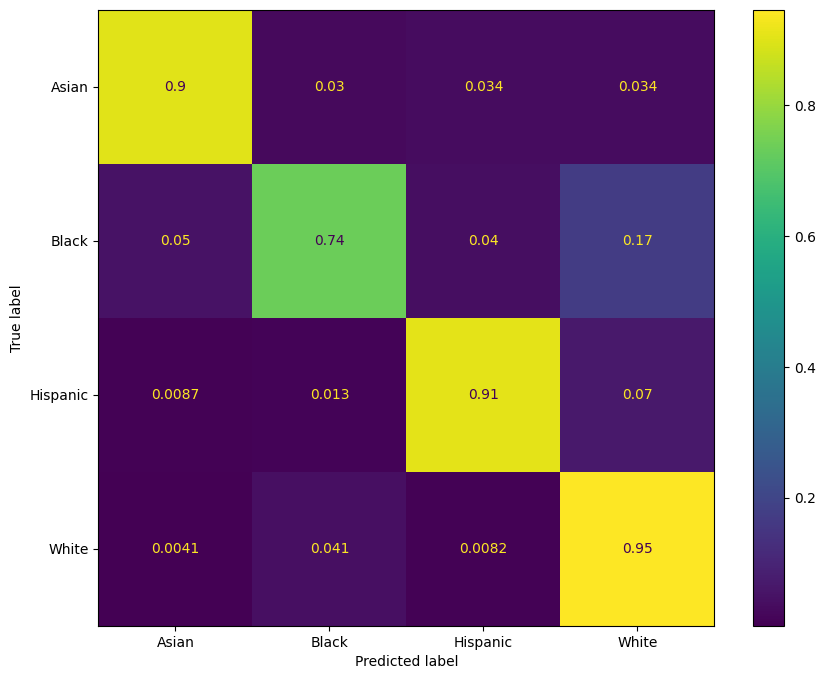

In [ ]:
print("Fold 0")
show_confusion_matrix(predictions[0]["label"], predictions[0]["predictions"], normalize="true")

Fold 1


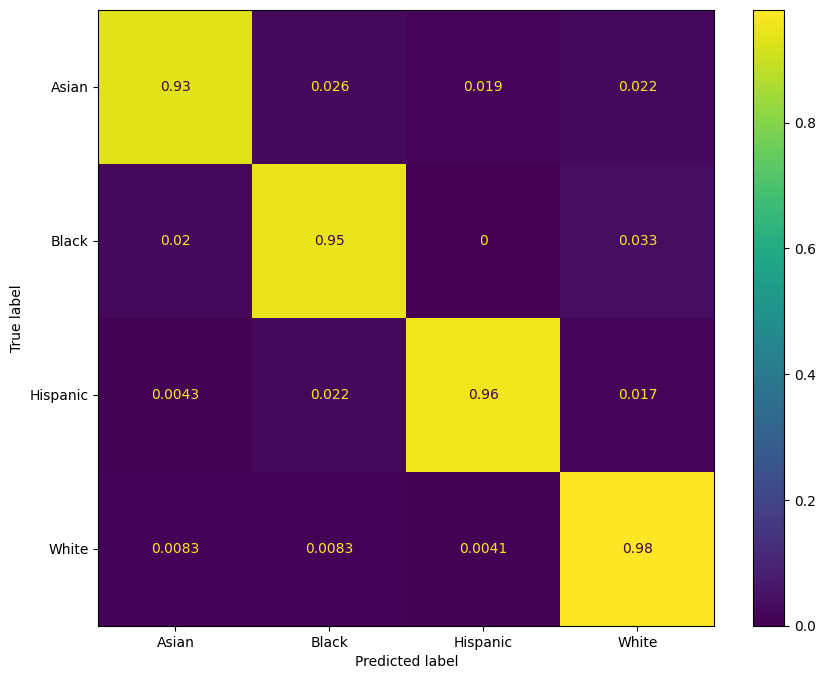

In [ ]:
print("Fold 1")
show_confusion_matrix(predictions[1]["label"], predictions[1]["predictions"], normalize="true")

Fold 2


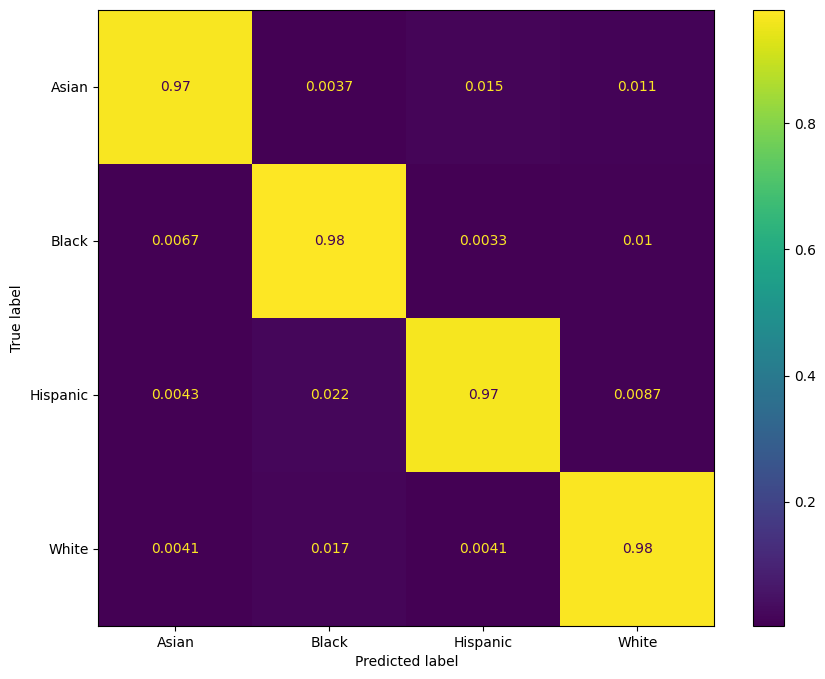

In [ ]:
print("Fold 2")
show_confusion_matrix(predictions[2]["label"], predictions[2]["predictions"], normalize="true")

Fold 3


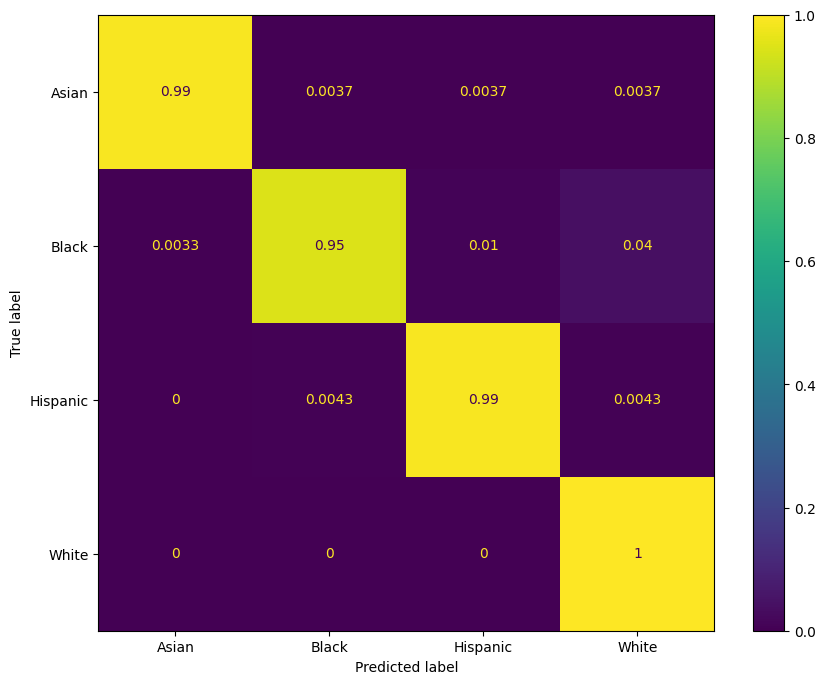

In [ ]:
print("Fold 3")
show_confusion_matrix(predictions[3]["label"], predictions[3]["predictions"], normalize="true")

Fold 4


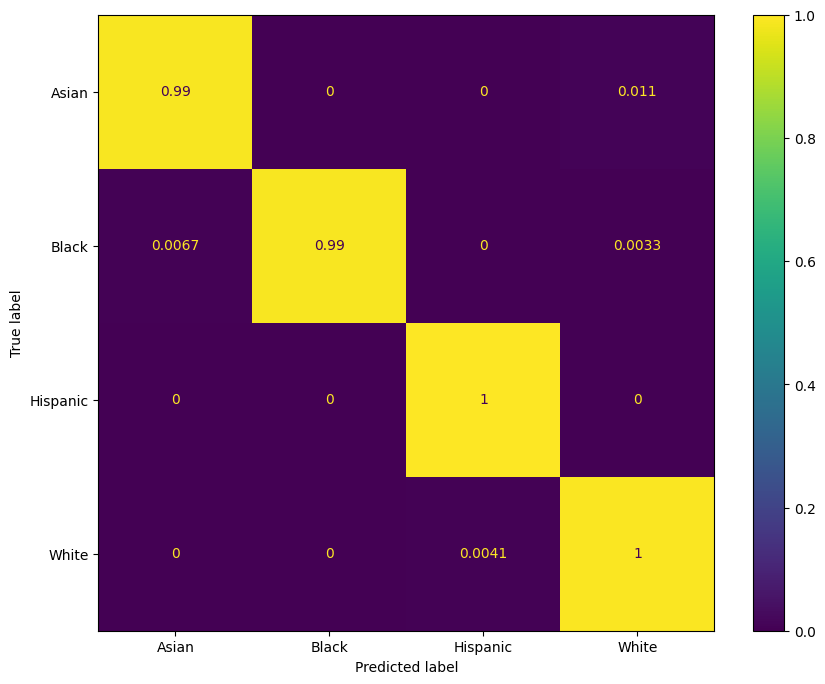

In [ ]:
print("Fold 4")
show_confusion_matrix(predictions[4]["label"], predictions[4]["predictions"], normalize="true")

Overall


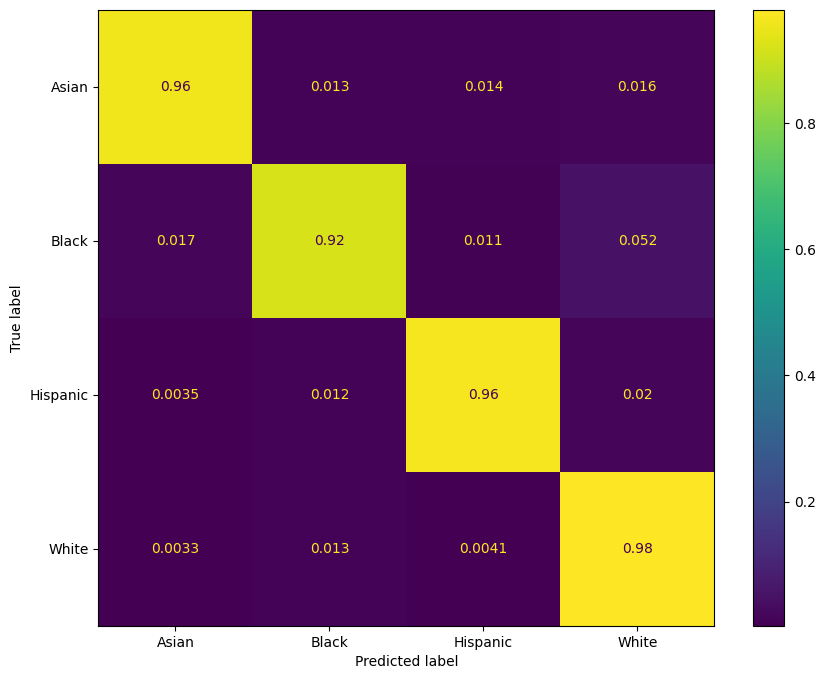

In [ ]:
print("Overall")
show_confusion_matrix(test_predictions["label"], test_predictions["predictions"], normalize="true")